<a href="https://colab.research.google.com/github/rohitshekar/storm/blob/main/stromipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
a=pd.read_csv('tornado.csv')
a.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,mag,inj,fat,loss,closs,slat,slon,elat,elon,len,wid,fc
0,1,1950,1,3,1/3/1950,11:00:00,3,MO,29,1,3,3,0,6.0,0.0,38.77,-90.22,38.83,-90.03,9.5,150,0
1,2,1950,1,3,1/3/1950,11:55:00,3,IL,17,2,3,3,0,5.0,0.0,39.10,-89.30,39.12,-89.23,3.6,130,0
2,3,1950,1,3,1/3/1950,16:00:00,3,OH,39,1,1,1,0,4.0,0.0,40.88,-84.58,0.00,0.00,0.1,10,0
3,4,1950,1,13,1/13/1950,5:25:00,3,AR,5,1,3,1,1,3.0,0.0,34.40,-94.37,0.00,0.00,0.6,17,0
4,5,1950,1,25,1/25/1950,19:30:00,3,MO,29,2,2,5,0,5.0,0.0,37.60,-90.68,37.63,-90.65,2.3,300,0


In [ ]:
a=a.drop('date',axis=1)

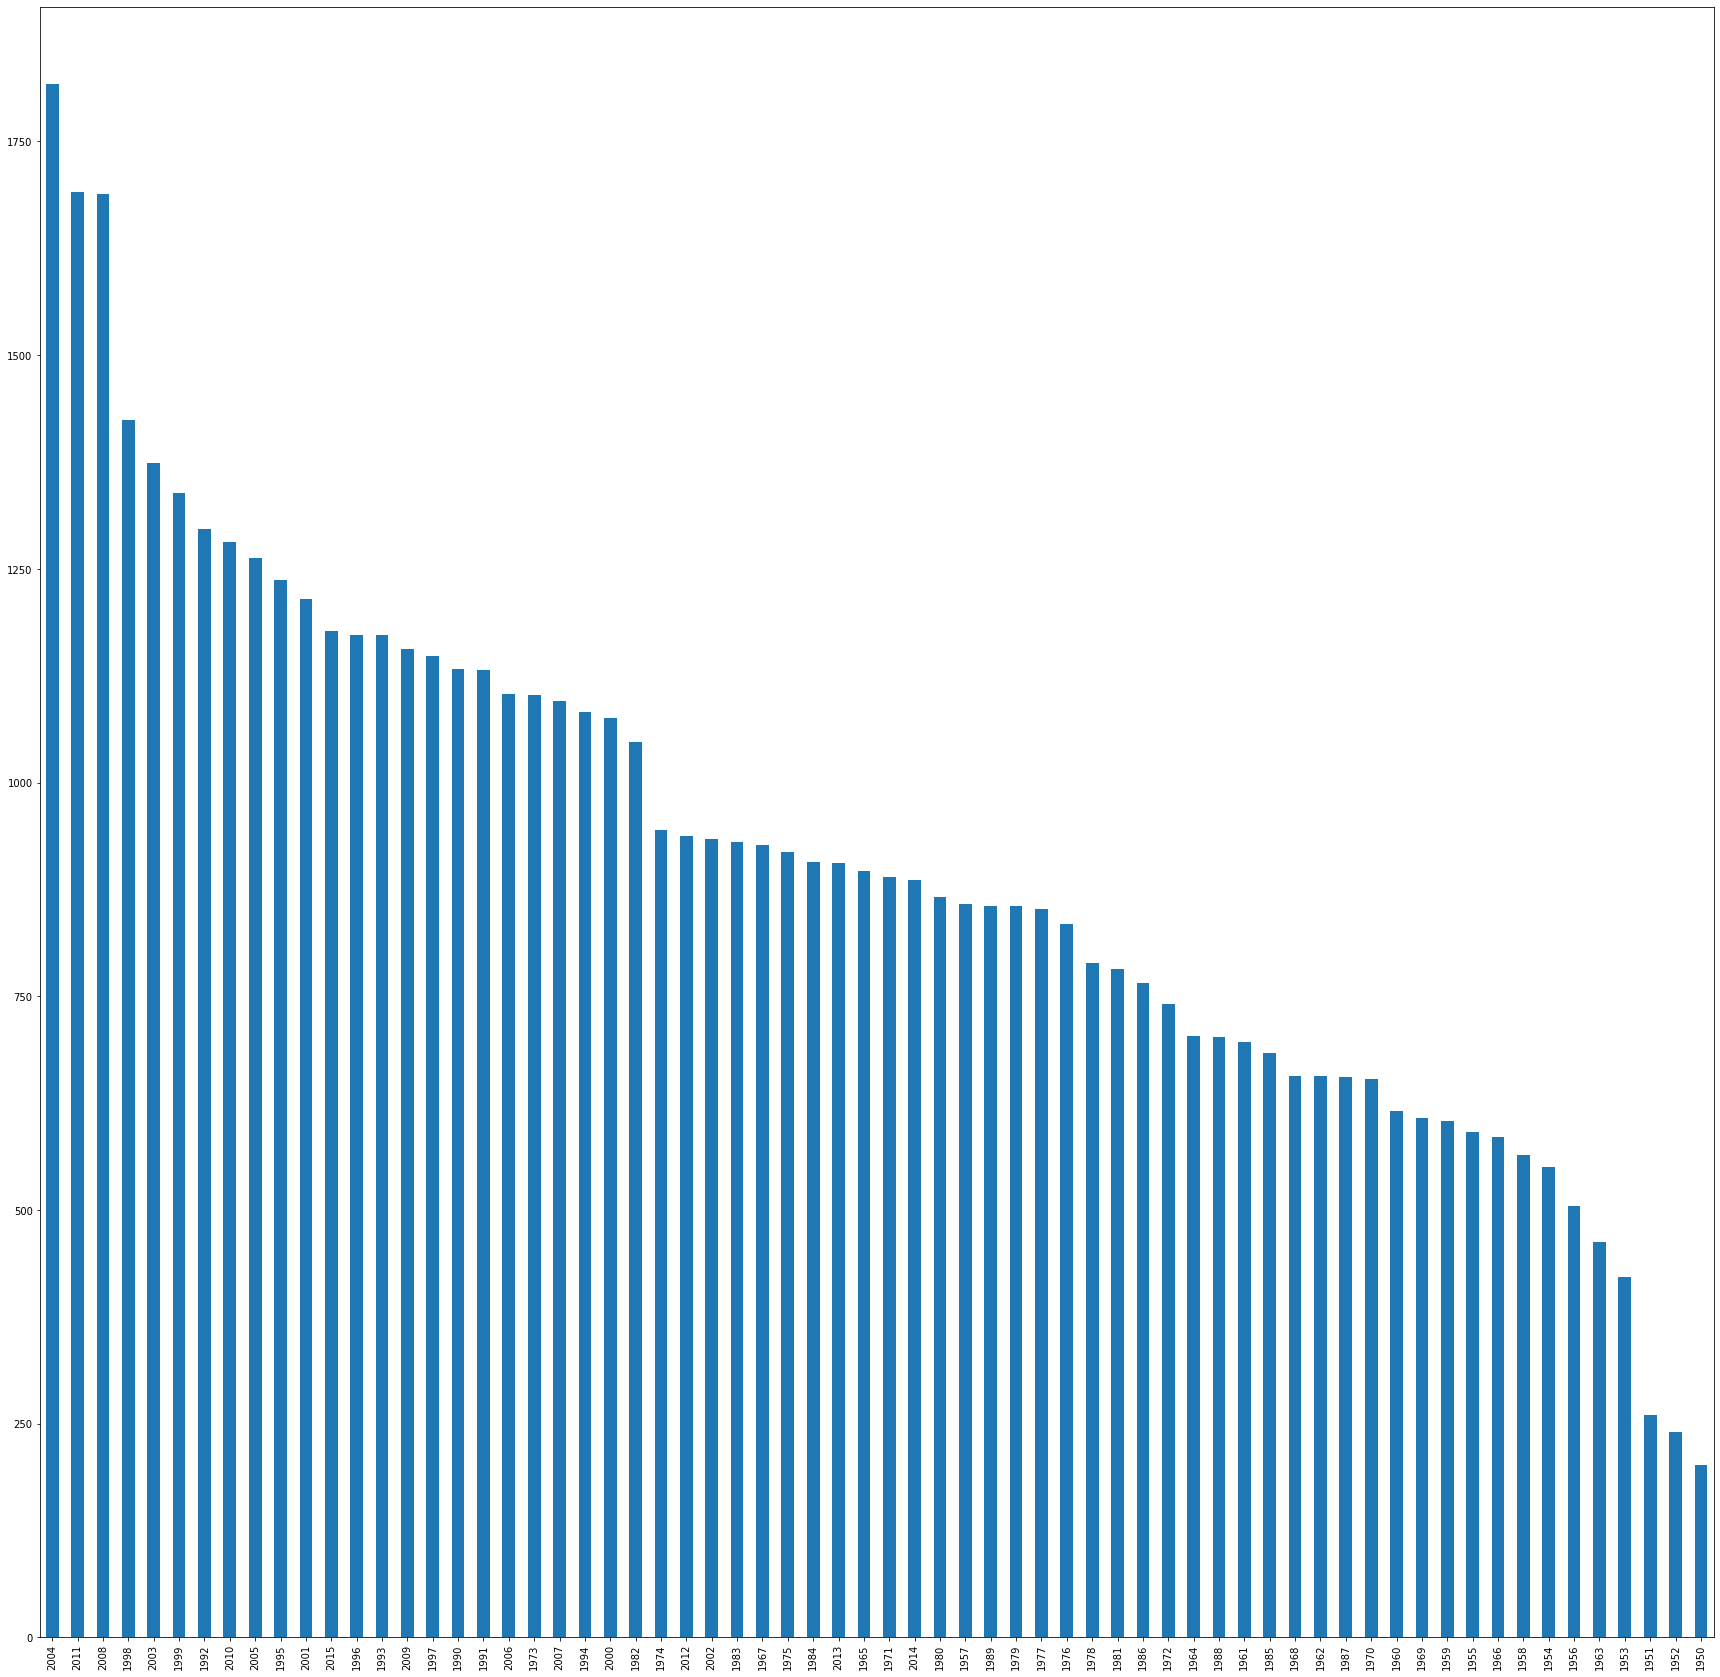

In [ ]:
a['yr'].value_counts().plot(kind='bar',figsize=(30,30))

In [ ]:
a['hour']=pd.to_datetime(a['time'],format="%H:%M:%S").dt.hour
a['min']=pd.to_datetime(a['time'],format="%H:%M:%S").dt.minute
a['sec']=pd.to_datetime(a['time'],format="%H:%M:%S").dt.second

In [ ]:
val=a['st'].value_counts()
a['st']=a['st'].map(val)

In [ ]:
a=a.drop('time',axis=1)

In [ ]:
x=a.drop('mag',axis=1)
y=a['mag']

In [ ]:
from imblearn.over_sampling import SMOTE
res=SMOTE(random_state=0)
x_res,y_res=res.fit_resample(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
cl=RandomForestClassifier(bootstrap=True,n_estimators=100)
cl.fit(x_train,y_train)
y_pred=cl.predict(x_test)
print(np.sum(y_pred==y_test)/len(y_test))

0.8892004773269689


In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd


In [ ]:
a=pd.read_csv('tornado.csv')
a.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,mag,inj,fat,loss,closs,slat,slon,elat,elon,len,wid,fc
0,1,1950,1,3,1/3/1950,11:00:00,3,MO,29,1,3,3,0,6.0,0.0,38.77,-90.22,38.83,-90.03,9.5,150,0
1,2,1950,1,3,1/3/1950,11:55:00,3,IL,17,2,3,3,0,5.0,0.0,39.10,-89.30,39.12,-89.23,3.6,130,0
2,3,1950,1,3,1/3/1950,16:00:00,3,OH,39,1,1,1,0,4.0,0.0,40.88,-84.58,0.00,0.00,0.1,10,0
3,4,1950,1,13,1/13/1950,5:25:00,3,AR,5,1,3,1,1,3.0,0.0,34.40,-94.37,0.00,0.00,0.6,17,0
4,5,1950,1,25,1/25/1950,19:30:00,3,MO,29,2,2,5,0,5.0,0.0,37.60,-90.68,37.63,-90.65,2.3,300,0


In [ ]:
a.isnull().sum(
    
)

om       0
yr       0
mo       0
dy       0
date     0
time     0
tz       0
st       0
stf      0
stn      0
mag      0
inj      0
fat      0
loss     0
closs    0
slat     0
slon     0
elat     0
elon     0
len      0
wid      0
fc       0
dtype: int64

In [ ]:
a['hour']=pd.to_datetime(a['time'],format='%H:%M:%S').dt.hour
a['minute']=pd.to_datetime(a['time'],format='%H:%M:%S').dt.minute
a['second']=pd.to_datetime(a['time'],format='%H:%M:%S').dt.second

In [ ]:
a=a.drop('time',axis=1)

In [ ]:
num_cols=a.select_dtypes(np.number).columns
for i in num_cols:
  if (abs(a[i].skew()))>0.8:
      a[i]=np.log(a[i]+1)

In [ ]:
a=a.drop('date',axis=1)

In [ ]:
vals=a['st'].value_counts().sort_values(ascending=False)
a['st']=a['st'].map(vals)

In [ ]:
x=a.drop('mag',axis=1)
y=a['mag']

In [ ]:
y

0        1.386294
1        1.386294
2        0.693147
3        1.386294
4        1.098612
           ...   
60109    0.693147
60110    1.098612
60111    0.693147
60112    0.693147
60113    0.000000
Name: mag, Length: 60114, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=100,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=100,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.3))
ann.add(tf.keras.layers.Dense(units=1,activation='softmax'))

In [ ]:
ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
ann.fit(x_train,y_train,batch_size=32,epochs=200)
y_pred=ann.predict(x_test)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print(score)